# Prophet Forecasting Model

This notebook implements a Facebook Prophet model on the `mock_kaggle.csv` dataset to generate demand forecasts.

In [5]:
# --- Install and imports ---
!pip -q install prophet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- Load processed data (not raw) ---
import pandas as pd

PROCESSED_URL = "https://raw.githubusercontent.com/MiltosTsir/supply-chain-analysis-portfolio/main/portfolio/01-demand-forecasting/data/processed/cleaned_sales.csv"

df = pd.read_csv(PROCESSED_URL, parse_dates=["data"])
df = df.sort_values("data").reset_index(drop=True)

# Prophet requires ds (date) and y (target)
prophet_df = df.rename(columns={"data": "ds", "venda": "y"})[["ds", "y"]].copy()
prophet_df.head()


,ds,y
0,2014-01-28,86.0
1,2014-01-29,222.0
2,2014-01-30,272.0
3,2014-01-31,209.0
4,2014-02-01,369.0


In [2]:
# --- Train/Test split ---
horizon = 60 if len(prophet_df) > 120 else max(1, len(prophet_df)//5)
train = prophet_df.iloc[:-horizon]
test = prophet_df.iloc[-horizon:]
print("Train size:", len(train), " Test size:", len(test))

Train size: 856  Test size: 60


DEBUG:cmdstanpy:input tempfile: /tmp/tmp51prsuv0/gvl6_mzn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp51prsuv0/lgr3wzmr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2086', 'data', 'file=/tmp/tmp51prsuv0/gvl6_mzn.json', 'init=/tmp/tmp51prsuv0/lgr3wzmr.json', 'output', 'file=/tmp/tmp51prsuv0/prophet_modeloq9prh2f/prophet_model-20250907203810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:38:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:38:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


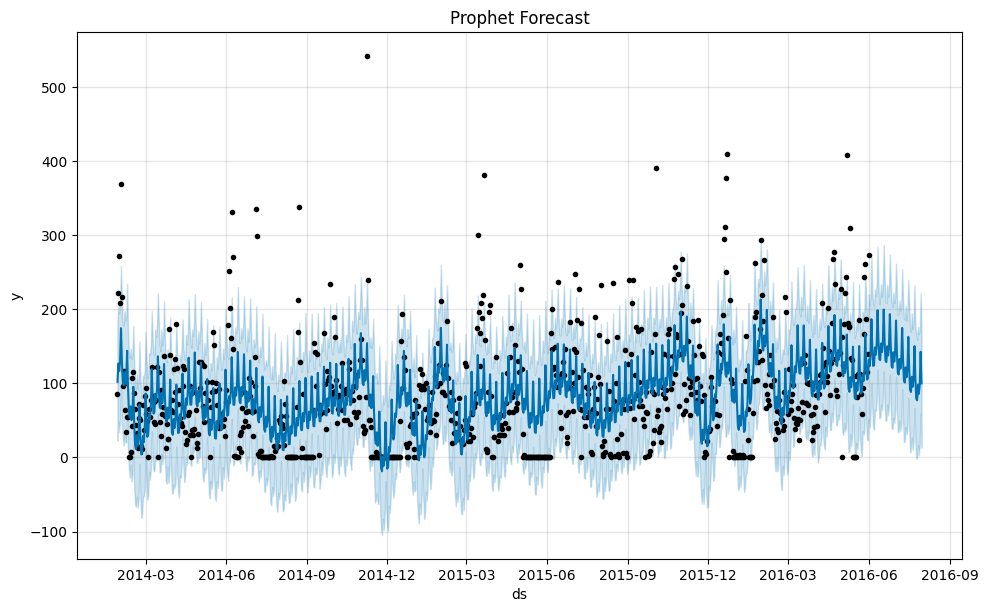

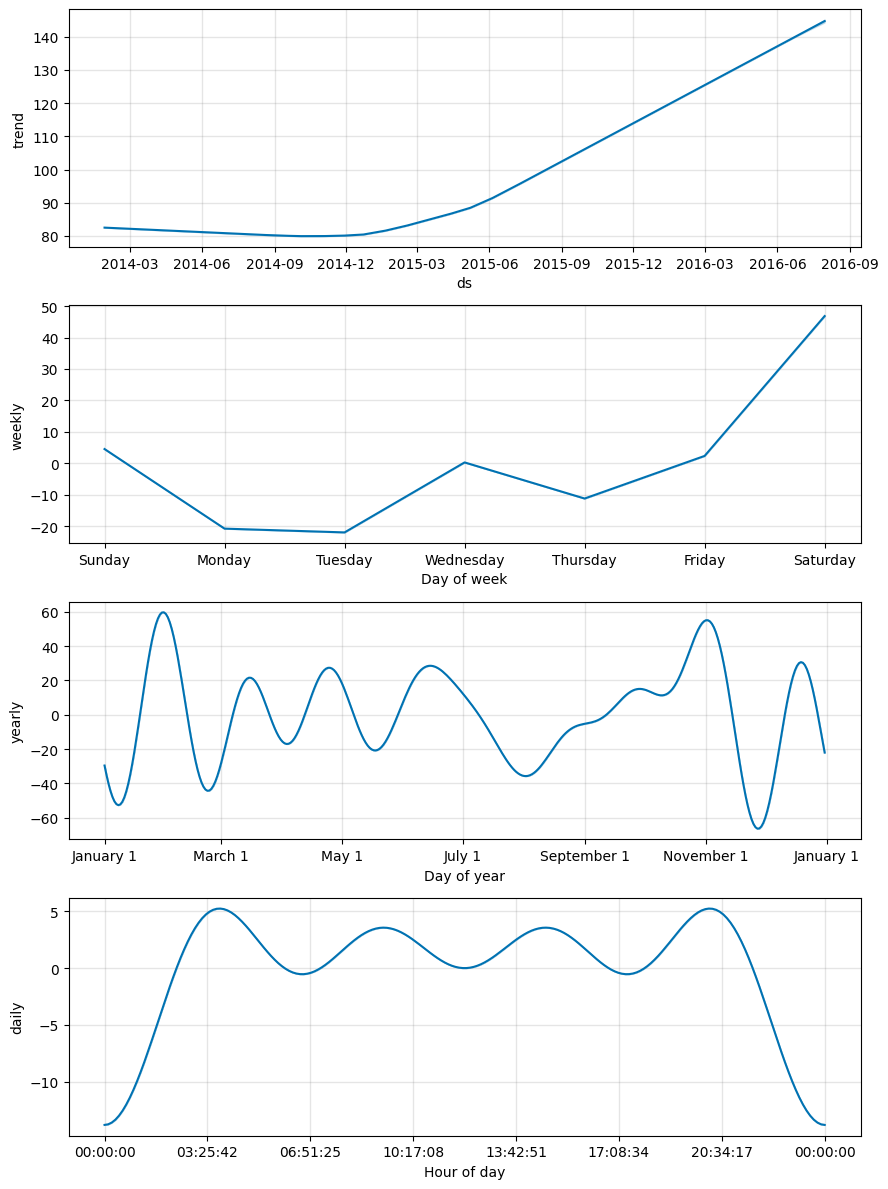

In [3]:
# --- Fit Prophet model ---
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(train)

# --- Forecast ---
future = model.make_future_dataframe(periods=horizon)
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

In [4]:
# --- Evaluation ---
pred = forecast.set_index("ds").loc[test["ds"]]["yhat"]
mae = mean_absolute_error(test["y"], pred)
rmse = np.sqrt(mean_squared_error(test["y"], pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 81.77
RMSE: 104.19
